<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EC%B4%88%EC%9D%B4%EC%8A%A4%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up modules

In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import theano


# Logit 초이스 모형

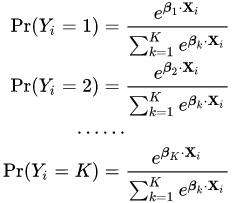

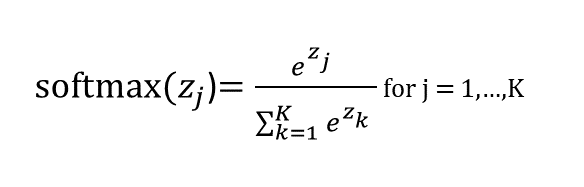

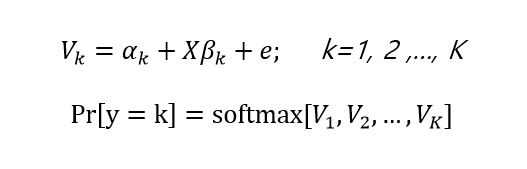

In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
import seaborn as sea
sea.set()
sea.set
%matplotlib inline


# 데이터를 불러오자

In [3]:
data = sea.load_dataset('iris', header=None, names=[0, 1, 2, 3, 'TYPE'])
data = data.drop(index=0)     # 첫 행을 삭제
data

,0,1,2,3,TYPE
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [4]:
data['TYPE']= LabelEncoder().fit_transform(data['TYPE'])   # type을 index 로 변환
data

,0,1,2,3,TYPE
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


In [5]:
y_obs = data['TYPE'].values
x_n = data.columns[:-1]
x = data[x_n].values
x = StandardScaler().fit_transform(x)

ndata = x.shape[0]
nparam = x.shape[1]
nclass = len(data['TYPE'].unique())  # alternative의 숫자

print( y_obs.shape, x.shape )


(150,) (150, 4)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alfa]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:12<00:00, 207.12it/s]


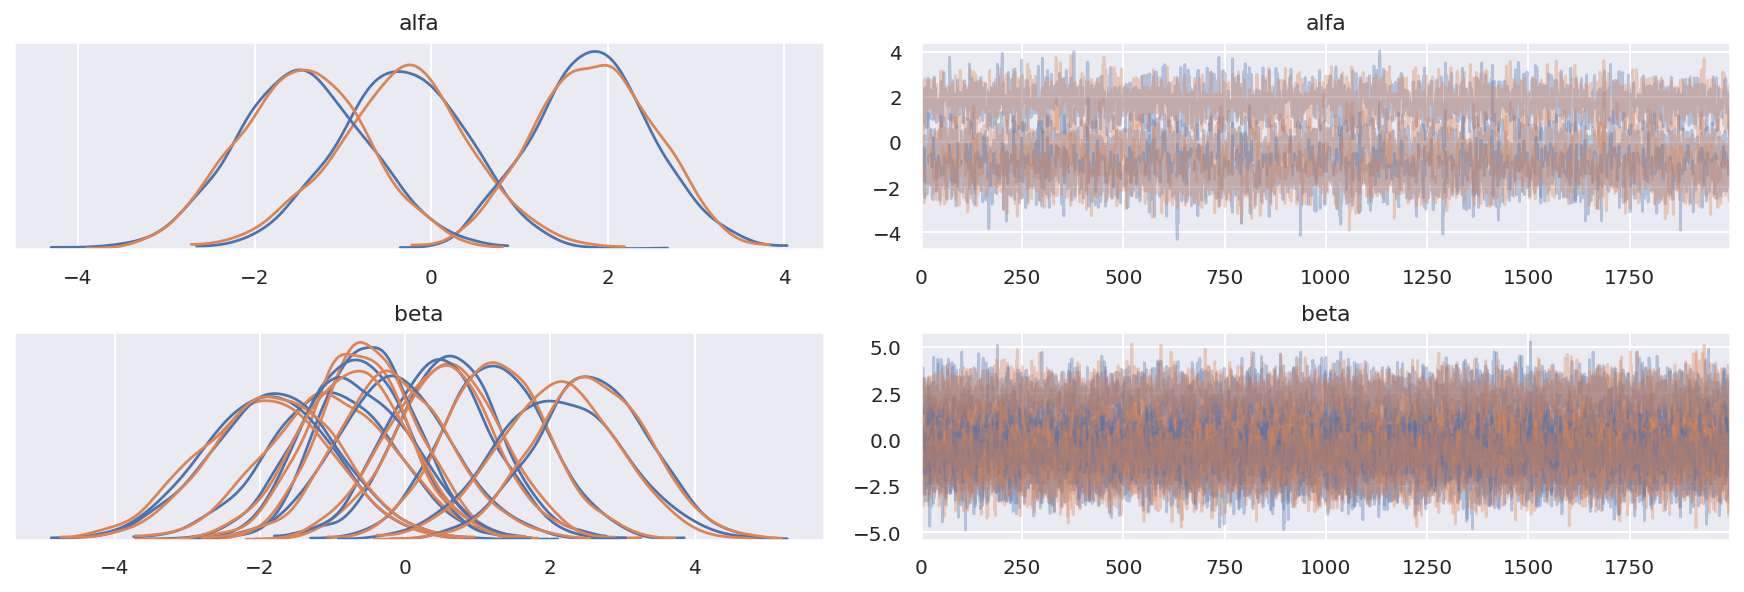

In [10]:
import warnings
warnings.filterwarnings('ignore')

import theano.tensor as tt
with pm.Model() as choice_model:
    X_data = pm.Data('X_data', x)
    y_obs_data = pm.Data('y_obs_data', y_obs)
    alfa = pm.Normal('alfa', mu=0, sd=1, shape=nclass)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(nparam, nclass))
    mu = tt.dot(X_data, beta) + alfa
    p = tt.nnet.softmax(mu)
    yl = pm.Categorical('obs', p=p, observed=y_obs_data)
    trace = pm.sample(2000)
    idata = az.from_pymc3(trace)
    pm.traceplot(idata)

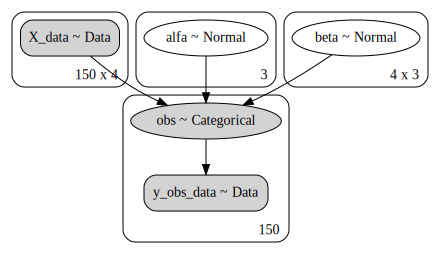

In [7]:
pm.model_to_graphviz(choice_model)

# What about normalization!!

In [11]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alfa[0],-0.340,0.740,-1.795,0.972,0.012,0.010,3506.0,2519.0,3513.0,3175.0,1.0
alfa[1],1.832,0.675,0.493,3.012,0.012,0.009,2989.0,2901.0,2970.0,2847.0,1.0
alfa[2],-1.477,0.732,-2.795,-0.067,0.013,0.009,3304.0,3182.0,3315.0,3104.0,1.0
"beta[0,0]",-1.038,0.866,-2.745,0.512,0.013,0.011,4557.0,3262.0,4575.0,3029.0,1.0
"beta[0,1]",0.589,0.713,-0.707,1.984,0.012,0.009,3392.0,2904.0,3392.0,2810.0,1.0
"beta[0,2]",0.458,0.727,-0.946,1.775,0.013,0.010,3303.0,2556.0,3313.0,2748.0,1.0
"beta[1,0]",1.242,0.722,-0.138,2.597,0.013,0.009,3186.0,2925.0,3196.0,2991.0,1.0
"beta[1,1]",-0.498,0.647,-1.666,0.732,0.013,0.009,2581.0,2581.0,2578.0,2527.0,1.0
"beta[1,2]",-0.675,0.678,-1.932,0.603,0.013,0.009,2853.0,2853.0,2865.0,3001.0,1.0
"beta[2,0]",-1.945,0.883,-3.538,-0.263,0.015,0.011,3524.0,3412.0,3516.0,2800.0,1.0
